In [21]:
import numpy as np
import torch
from torch import Tensor
from model import Generator
import matplotlib.pyplot as plt
from PIL import Image

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [23]:
input_shape = [1, 32, 32]

In [24]:
model_path = "work_dirs/20240411-093558-mnist/latest_generator.pth"
generator = Generator(input_shape=input_shape, hidden_channels=64, n_residual_blocks=1).to(device)
generator.load_state_dict(torch.load(model_path))
generator

Generator(
  (stage1): ConvNormAct(
    (conv): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm): InstanceNorm2d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (act): ReLU(inplace=True)
  )
  (stage2): Sequential(
    (0): ConvNormAct(
      (conv): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (norm): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (act): ReLU(inplace=True)
    )
    (1): ResidualBlock(
      (conv): Sequential(
        (0): ConvNormAct(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
          (act): ReLU(inplace=True)
        )
        (1): ConvNormAct(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, t

In [25]:
def generate(batch: int = 1):
    randn_input = torch.randn(batch, *input_shape).to(device)
    generator.eval()
    with torch.inference_mode():
        images = generator(randn_input).cpu().permute(0, 2, 3, 1).numpy()
    return images

In [26]:
images = generate(12)
images.shape

(12, 32, 32, 1)

(array([10590.,   125.,    89.,    71.,    67.,    72.,    99.,   102.,
          152.,   921.]),
 array([-1.00000000e+00, -8.00014019e-01, -6.00028038e-01, -4.00042027e-01,
        -2.00056046e-01, -7.00652599e-05,  1.99915916e-01,  3.99901897e-01,
         5.99887908e-01,  7.99873888e-01,  9.99859869e-01]),
 <BarContainer object of 10 artists>)

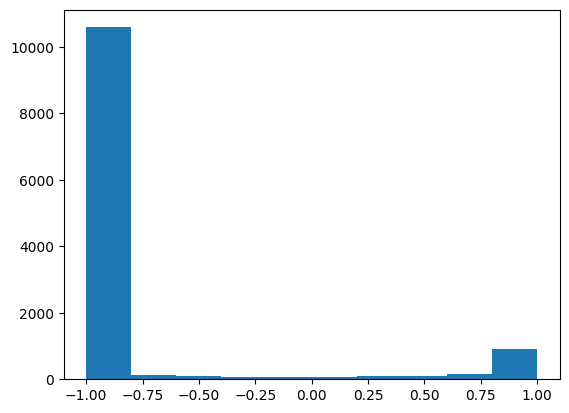

In [27]:
plt.hist(images.flatten())

In [28]:
# scale to 0-255
images = np.array(((images + 1) / 2) * 255, dtype=np.uint8)

(array([10591.,   124.,    90.,    70.,    65.,    74.,    98.,   103.,
          150.,   923.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

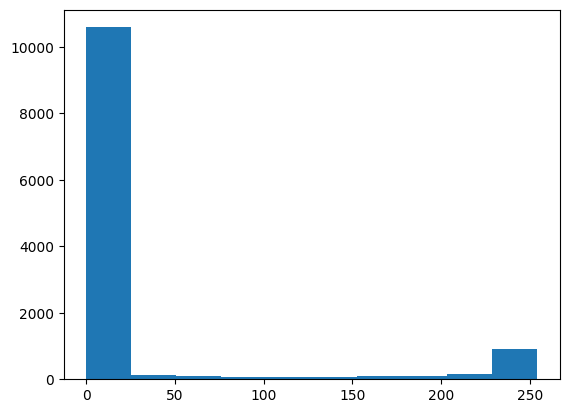

In [29]:
plt.hist(images.flatten())

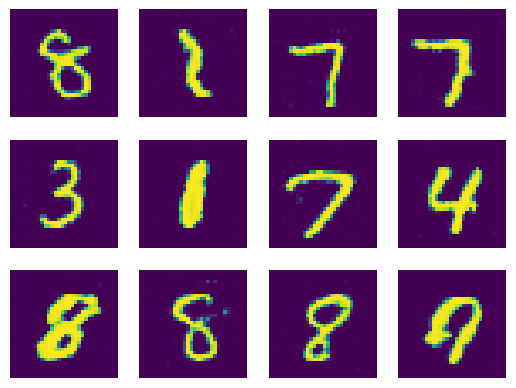

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=4)
for image, ax in zip(images, axes.ravel()):
    ax.imshow(image)
    ax.axis('off')